## Laptop Prices Regression Exercise

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

#### Importing the dataset

In [4]:
df = pd.read_csv('laptop_prices.csv')

# Tüm sütunları ve satırları tam göster
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,1600,No,Yes,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,900,No,No,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,1800,No,Yes,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,1600,No,Yes,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


#### Analyzing the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [7]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


In [8]:
print("Missing data:\n",  df.isnull().sum()) # pandas'ın özelliği

Missing data:
 Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64


##### Analyzing the datatypes

In [10]:
df.nunique()

Company                  19
Product                 618
TypeName                  6
Inches                   18
Ram                       9
OS                        9
Weight                  171
Price_euros             791
Screen                    4
ScreenW                  13
ScreenH                  10
Touchscreen               2
IPSpanel                  2
RetinaDisplay             2
CPU_company               3
CPU_freq                 25
CPU_model                93
PrimaryStorage           13
SecondaryStorage          6
PrimaryStorageType        4
SecondaryStorageType      4
GPU_company               4
GPU_model               110
dtype: int64

In [11]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [12]:
df['Product'].unique()

array(['MacBook Pro', 'Macbook Air', '250 G6', 'Aspire 3',
       'ZenBook UX430UN', 'Swift 3', 'Inspiron 3567', 'MacBook 12"',
       'IdeaPad 320-15IKB', 'XPS 13', 'Vivobook E200HA',
       'Legion Y520-15IKBN', '255 G6', 'Inspiron 5379',
       '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)', 'MacBook Air',
       'Inspiron 5570', 'Latitude 5590', 'ProBook 470', 'LapBook 15.6"',
       'E402WA-GA010T (E2-6110/2GB/32GB/W10)',
       '17-ak001nv (A6-9220/4GB/500GB/Radeon', 'IdeaPad 120S-14IAP',
       'Inspiron 5770', 'ProBook 450',
       'X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux)', 'Inspiron 7577',
       'X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce', 'Aspire A515-51G',
       'Inspiron 7773', 'IdeaPad 320-15ISK', 'Rog Strix',
       'X751NV-TY001T (N4200/4GB/1TB/GeForce', 'Yoga Book', 'ProBook 430',
       'Inspiron 3576', '15-bs002nv (i3-6006U/4GB/128GB/FHD/W10)',
       'VivoBook Max', 'GS73VR 7RG',
       'X541UA-DM1897 (i3-6006U/4GB/256GB/FHD/Linux)', 'Vostro 5471',
       'IdeaPad 520S-1

In [13]:
df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [14]:
df['OS'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [15]:
df['Screen'].unique()

array(['Standard', 'Full HD', 'Quad HD+', '4K Ultra HD'], dtype=object)

In [16]:
df['CPU_company'].unique()

array(['Intel', 'AMD', 'Samsung'], dtype=object)

In [17]:
df['CPU_model'].unique()

array(['Core i5', 'Core i5 7200U', 'Core i7', 'A9-Series 9420',
       'Core i7 8550U', 'Core i5 8250U', 'Core i3 6006U', 'Core M m3',
       'Core i7 7500U', 'Core i3 7100U', 'Atom x5-Z8350',
       'Core i5 7300HQ', 'E-Series E2-9000e', 'Core i7 8650U',
       'Atom x5-Z8300', 'E-Series E2-6110', 'A6-Series 9220',
       'Celeron Dual Core N3350', 'Core i3 7130U', 'Core i7 7700HQ',
       'Ryzen 1700', 'Pentium Quad Core N4200', 'Atom x5-Z8550',
       'Celeron Dual Core N3060', 'FX 9830P', 'Core i7 7560U',
       'E-Series 6110', 'Core i5 6200U', 'Core M 6Y75', 'Core i5 7500U',
       'Core i7 6920HQ', 'Core i5 7Y54', 'Core i7 7820HK',
       'Xeon E3-1505M V6', 'Core i7 6500U', 'E-Series 9000e',
       'A10-Series A10-9620P', 'A6-Series A6-9220', 'Core i7 6600U',
       'Celeron Dual Core 3205U', 'Core i7 7820HQ', 'A10-Series 9600P',
       'Core i7 7600U', 'A8-Series 7410', 'Celeron Dual Core 3855U',
       'Pentium Quad Core N3710', 'A12-Series 9720P', 'Core i5 7300U',
       'Ce

In [18]:
df['PrimaryStorageType'].unique()

array(['SSD', 'Flash Storage', 'HDD', 'Hybrid'], dtype=object)

In [19]:
df['SecondaryStorageType'].unique()

array(['No', 'HDD', 'SSD', 'Hybrid'], dtype=object)

In [20]:
df['GPU_company'].unique()

array(['Intel', 'AMD', 'Nvidia', 'ARM'], dtype=object)

In [21]:
df['GPU_model'].unique()

array(['Iris Plus Graphics 640', 'HD Graphics 6000', 'HD Graphics 620',
       'Radeon Pro 455', 'Iris Plus Graphics 650', 'Radeon R5',
       'Iris Pro Graphics', 'GeForce MX150', 'UHD Graphics 620',
       'HD Graphics 520', 'Radeon Pro 555', 'Radeon R5 M430',
       'HD Graphics 615', 'Radeon Pro 560', 'GeForce 940MX',
       'HD Graphics 400', 'GeForce GTX 1050', 'Radeon R2', 'Radeon 530',
       'GeForce 930MX', 'HD Graphics', 'HD Graphics 500',
       'GeForce 930MX ', 'GeForce GTX 1060', 'GeForce 150MX',
       'Iris Graphics 540', 'Radeon RX 580', 'GeForce 920MX',
       'Radeon R4 Graphics', 'Radeon 520', 'GeForce GTX 1070',
       'GeForce GTX 1050 Ti', 'GeForce MX130', 'R4 Graphics',
       'GeForce GTX 940MX', 'Radeon RX 560', 'GeForce 920M',
       'Radeon R7 M445', 'Radeon RX 550', 'GeForce GTX 1050M',
       'HD Graphics 515', 'Radeon R5 M420', 'HD Graphics 505',
       'GTX 980 SLI', 'R17M-M1-70', 'GeForce GTX 1080', 'Quadro M1200',
       'GeForce 920MX ', 'GeForce GTX

#### Encoding

In [23]:
df = pd.get_dummies(df, columns=['TypeName', 'OS', 'Screen', 'CPU_company', 'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company'])
df.head()

,Company,Product,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,GPU_model,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,OS_Android,OS_Chrome OS,OS_Linux,OS_Mac OS X,OS_No OS,OS_Windows 10,OS_Windows 10 S,OS_Windows 7,OS_macOS,Screen_4K Ultra HD,Screen_Full HD,Screen_Quad HD+,Screen_Standard,CPU_company_AMD,CPU_company_Intel,CPU_company_Samsung,PrimaryStorageType_Flash Storage,PrimaryStorageType_HDD,PrimaryStorageType_Hybrid,PrimaryStorageType_SSD,SecondaryStorageType_HDD,SecondaryStorageType_Hybrid,SecondaryStorageType_No,SecondaryStorageType_SSD,GPU_company_AMD,GPU_company_ARM,GPU_company_Intel,GPU_company_Nvidia
0,Apple,MacBook Pro,13.3,8,1.37,1339.69,2560,1600,No,Yes,Yes,2.3,Core i5,128,0,Iris Plus Graphics 640,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False
1,Apple,Macbook Air,13.3,8,1.34,898.94,1440,900,No,No,No,1.8,Core i5,128,0,HD Graphics 6000,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False
2,HP,250 G6,15.6,8,1.86,575.00,1920,1080,No,No,No,2.5,Core i5 7200U,256,0,HD Graphics 620,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False
3,Apple,MacBook Pro,15.4,16,1.83,2537.45,2880,1800,No,Yes,Yes,2.7,Core i7,512,0,Radeon Pro 455,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,True,False,False,False
4,Apple,MacBook Pro,13.3,8,1.37,1803.60,2560,1600,No,Yes,Yes,3.1,Core i5,256,0,Iris Plus Graphics 650,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company                           1275 non-null   object 
 1   Product                           1275 non-null   object 
 2   Inches                            1275 non-null   float64
 3   Ram                               1275 non-null   int64  
 4   Weight                            1275 non-null   float64
 5   Price_euros                       1275 non-null   float64
 6   ScreenW                           1275 non-null   int64  
 7   ScreenH                           1275 non-null   int64  
 8   Touchscreen                       1275 non-null   object 
 9   IPSpanel                          1275 non-null   object 
 10  RetinaDisplay                     1275 non-null   object 
 11  CPU_freq                          1275 non-null   float64
 12  CPU_mo

In [25]:
le = LabelEncoder()

df['Company'] = le.fit_transform(df['Company'])
df['Product'] = le.fit_transform(df['Product'])
df['Touchscreen'] = le.fit_transform(df['Touchscreen'])
df['IPSpanel'] = le.fit_transform(df['IPSpanel'])
df['RetinaDisplay'] = le.fit_transform(df['RetinaDisplay'])
df['CPU_model'] = le.fit_transform(df['CPU_model'])
df['GPU_model'] = le.fit_transform(df['GPU_model'])

df.head()

,Company,Product,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,GPU_model,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,OS_Android,OS_Chrome OS,OS_Linux,OS_Mac OS X,OS_No OS,OS_Windows 10,OS_Windows 10 S,OS_Windows 7,OS_macOS,Screen_4K Ultra HD,Screen_Full HD,Screen_Quad HD+,Screen_Standard,CPU_company_AMD,CPU_company_Intel,CPU_company_Samsung,PrimaryStorageType_Flash Storage,PrimaryStorageType_HDD,PrimaryStorageType_Hybrid,PrimaryStorageType_SSD,SecondaryStorageType_HDD,SecondaryStorageType_Hybrid,SecondaryStorageType_No,SecondaryStorageType_SSD,GPU_company_AMD,GPU_company_ARM,GPU_company_Intel,GPU_company_Nvidia
0,1,300,13.3,8,1.37,1339.69,2560,1600,0,1,1,2.3,40,128,0,60,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False
1,1,301,13.3,8,1.34,898.94,1440,900,0,0,0,1.8,40,128,0,53,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False
2,7,50,15.6,8,1.86,575.00,1920,1080,0,0,0,2.5,46,256,0,55,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False
3,1,300,15.4,16,1.83,2537.45,2880,1800,0,1,1,2.7,54,512,0,80,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,True,False,False,False
4,1,300,13.3,8,1.37,1803.60,2560,1600,0,1,1,3.1,40,256,0,61,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company                           1275 non-null   int32  
 1   Product                           1275 non-null   int32  
 2   Inches                            1275 non-null   float64
 3   Ram                               1275 non-null   int64  
 4   Weight                            1275 non-null   float64
 5   Price_euros                       1275 non-null   float64
 6   ScreenW                           1275 non-null   int64  
 7   ScreenH                           1275 non-null   int64  
 8   Touchscreen                       1275 non-null   int32  
 9   IPSpanel                          1275 non-null   int32  
 10  RetinaDisplay                     1275 non-null   int32  
 11  CPU_freq                          1275 non-null   float64
 12  CPU_mo

#### Correlation Matrix

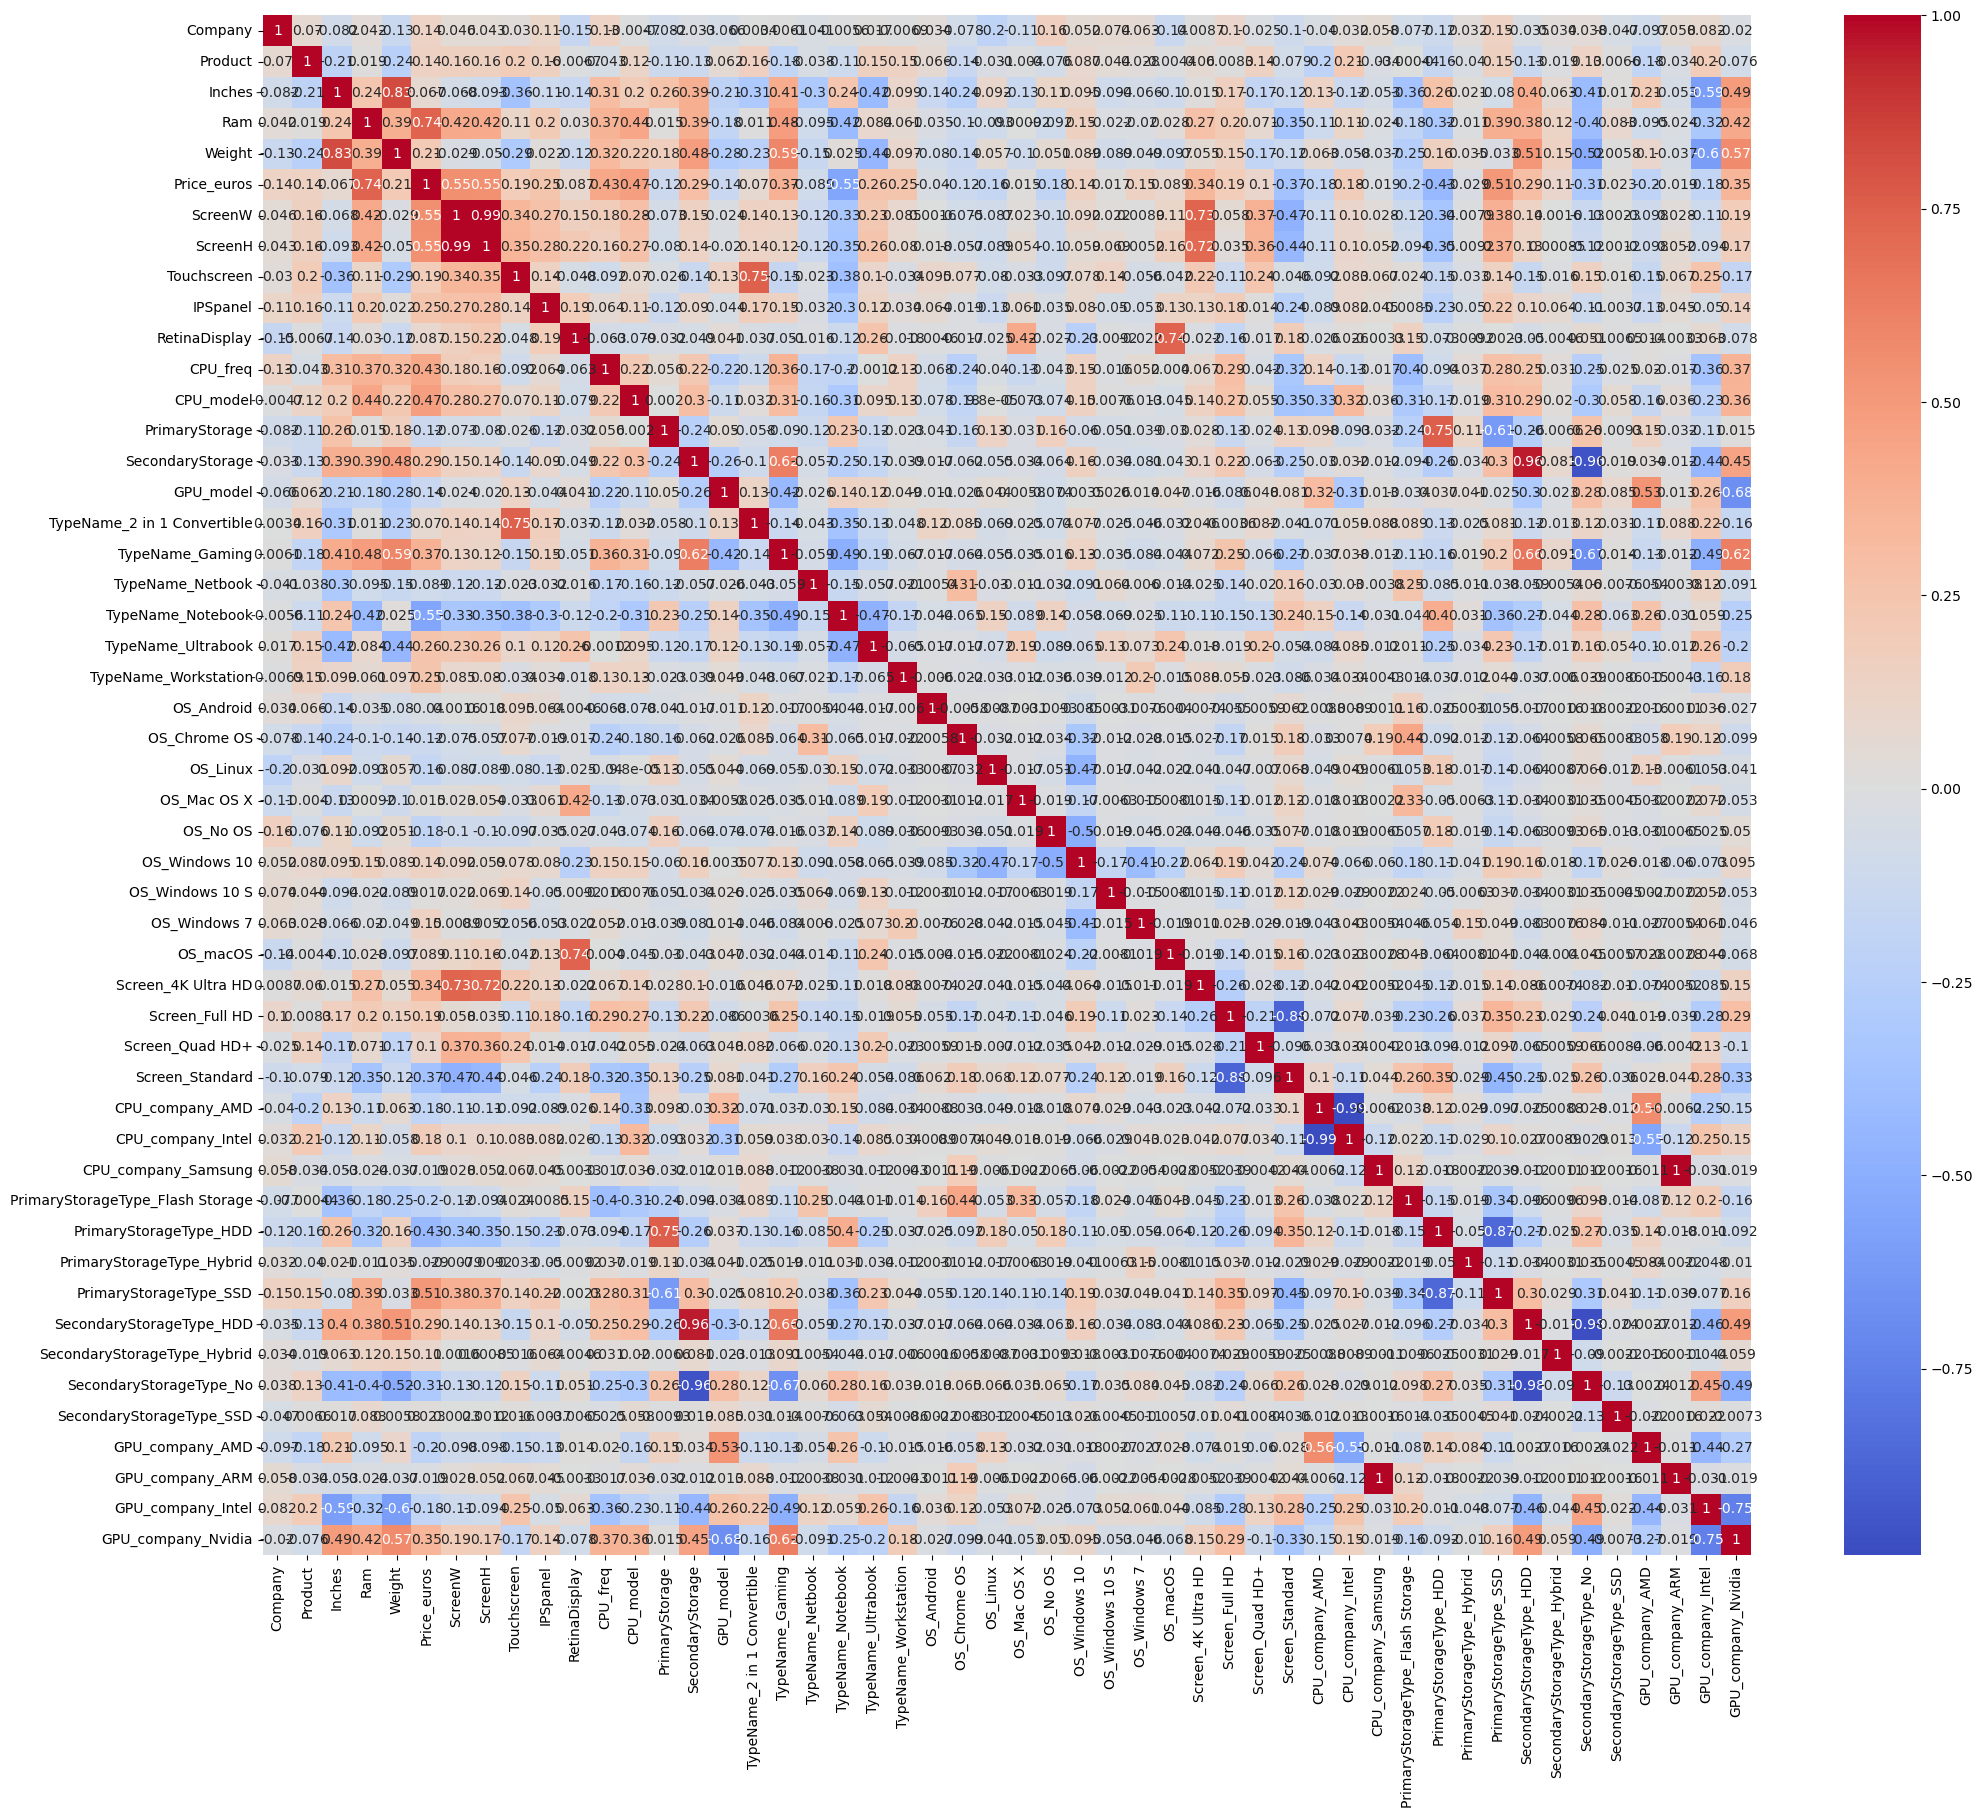

In [28]:
correlation_matrix=df.corr()
plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm")
plt.show()

#### Splitting dataset into X and Y

In [30]:
X = df.drop('Price_euros', axis=1)
y = df['Price_euros']

In [31]:
X

,Company,Product,Inches,Ram,Weight,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,GPU_model,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,OS_Android,OS_Chrome OS,OS_Linux,OS_Mac OS X,OS_No OS,OS_Windows 10,OS_Windows 10 S,OS_Windows 7,OS_macOS,Screen_4K Ultra HD,Screen_Full HD,Screen_Quad HD+,Screen_Standard,CPU_company_AMD,CPU_company_Intel,CPU_company_Samsung,PrimaryStorageType_Flash Storage,PrimaryStorageType_HDD,PrimaryStorageType_Hybrid,PrimaryStorageType_SSD,SecondaryStorageType_HDD,SecondaryStorageType_Hybrid,SecondaryStorageType_No,SecondaryStorageType_SSD,GPU_company_AMD,GPU_company_ARM,GPU_company_Intel,GPU_company_Nvidia
0,1,300,13.3,8,1.37,2560,1600,0,1,1,2.3,40,128,0,60,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False
1,1,301,13.3,8,1.34,1440,900,0,0,0,1.8,40,128,0,53,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False
2,7,50,15.6,8,1.86,1920,1080,0,0,0,2.5,46,256,0,55,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False
3,1,300,15.4,16,1.83,2880,1800,0,1,1,2.7,54,512,0,80,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,True,False,False,False
4,1,300,13.3,8,1.37,2560,1600,0,1,1,3.1,40,256,0,61,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,10,580,14.0,4,1.80,1920,1080,1,1,0,2.5,55,128,0,49,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False
1271,10,588,13.3,16,1.30,3200,1800,1,1,0,2.5,55,512,0,49,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False
1272,10,196,14.0,2,1.50,1366,768,0,0,0,1.6,20,64,0,42,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False
1273,7,2,15.6,6,2.19,1366,768,0,0,0,2.5,55,1024,0,92,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False


In [32]:
y

0       1339.69
1        898.94
2        575.00
3       2537.45
4       1803.60
         ...   
1270     638.00
1271    1499.00
1272     229.00
1273     764.00
1274     369.00
Name: Price_euros, Length: 1275, dtype: float64

#### Splitting dataset into train and test set

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

In [35]:
X_train

,Company,Product,Inches,Ram,Weight,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,GPU_model,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,OS_Android,OS_Chrome OS,OS_Linux,OS_Mac OS X,OS_No OS,OS_Windows 10,OS_Windows 10 S,OS_Windows 7,OS_macOS,Screen_4K Ultra HD,Screen_Full HD,Screen_Quad HD+,Screen_Standard,CPU_company_AMD,CPU_company_Intel,CPU_company_Samsung,PrimaryStorageType_Flash Storage,PrimaryStorageType_HDD,PrimaryStorageType_Hybrid,PrimaryStorageType_SSD,SecondaryStorageType_HDD,SecondaryStorageType_Hybrid,SecondaryStorageType_No,SecondaryStorageType_SSD,GPU_company_AMD,GPU_company_ARM,GPU_company_Intel,GPU_company_Nvidia
614,4,281,15.6,4,1.93,1366,768,0,0,0,2.60,48,500,0,55,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False
263,4,547,15.6,4,2.18,1920,1080,0,0,0,2.50,46,1024,0,55,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False
343,10,591,13.9,16,1.40,3840,2160,1,1,0,1.80,70,512,0,109,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False
276,4,252,17.3,8,2.80,1920,1080,0,0,0,1.80,70,128,1024,78,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False
50,10,592,10.1,4,0.69,1920,1200,1,1,0,1.44,17,64,0,43,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,7,111,14.0,8,1.48,1920,1080,0,0,0,2.60,48,256,0,55,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False
618,11,184,15.6,16,2.94,1920,1080,0,0,0,2.80,66,256,1024,22,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,True
227,2,545,15.6,8,2.00,1920,1080,0,0,0,2.50,46,256,0,9,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True
713,2,535,14.0,4,1.50,1920,1080,0,0,0,1.10,22,32,0,45,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False


In [36]:
X_test

,Company,Product,Inches,Ram,Weight,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,GPU_model,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,OS_Android,OS_Chrome OS,OS_Linux,OS_Mac OS X,OS_No OS,OS_Windows 10,OS_Windows 10 S,OS_Windows 7,OS_macOS,Screen_4K Ultra HD,Screen_Full HD,Screen_Quad HD+,Screen_Standard,CPU_company_AMD,CPU_company_Intel,CPU_company_Samsung,PrimaryStorageType_Flash Storage,PrimaryStorageType_HDD,PrimaryStorageType_Hybrid,PrimaryStorageType_SSD,SecondaryStorageType_HDD,SecondaryStorageType_Hybrid,SecondaryStorageType_No,SecondaryStorageType_SSD,GPU_company_AMD,GPU_company_ARM,GPU_company_Intel,GPU_company_Nvidia
801,2,360,15.6,8,2.370,1920,1080,0,0,0,2.5,46,256,0,55,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False
457,13,429,13.5,4,1.252,2256,1504,1,0,0,2.2,34,128,0,54,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False
250,4,250,15.6,8,2.080,1920,1080,1,1,0,1.8,70,1024,0,109,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False
11,7,50,15.6,4,1.860,1920,1080,0,0,0,2.0,36,500,0,49,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False
371,0,58,15.6,4,2.100,1366,768,0,0,0,3.0,11,128,0,88,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,4,576,13.3,8,1.200,1920,1080,0,0,0,1.8,70,256,0,109,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False
853,10,468,14.0,8,1.960,1920,1080,0,1,0,2.8,66,256,0,16,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True
439,2,538,15.6,4,2.000,1920,1080,0,0,0,2.5,46,256,0,55,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False
645,10,196,14.0,4,1.430,1366,768,0,0,0,1.6,21,32,0,42,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False


In [37]:
y_train

614     869.00
263     657.00
343    2099.00
276    1099.00
50      319.00
        ...   
335    1268.00
618    2267.86
227     769.00
713     298.00
906    1483.00
Name: Price_euros, Length: 1020, dtype: float64

In [38]:
y_test

801    1099.00
457     989.00
250     819.00
11      344.99
371     426.00
        ...   
208    1449.00
853    1903.00
439     559.00
645     274.00
22      258.00
Name: Price_euros, Length: 255, dtype: float64

#### Building the models

In [40]:
lr=LinearRegression()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()

In [41]:
lr.fit(X_train, y_train)

LinearRegression()

In [42]:
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.7471458402095481

In [43]:
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [44]:
y_pred = dt.predict(X_test)
r2_score(y_test, y_pred)

0.7060127350374348

In [45]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [46]:
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

0.8049001089529283